In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/force2020_data.csv')

In [ ]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [ ]:
df.isna().sum()/len(df)*100

,0
RHOB,0.000000
GR,0.000000
DEPTH_MD,0.000000
NPHI,23.196497
PEF,10.016420
DTC,0.443350


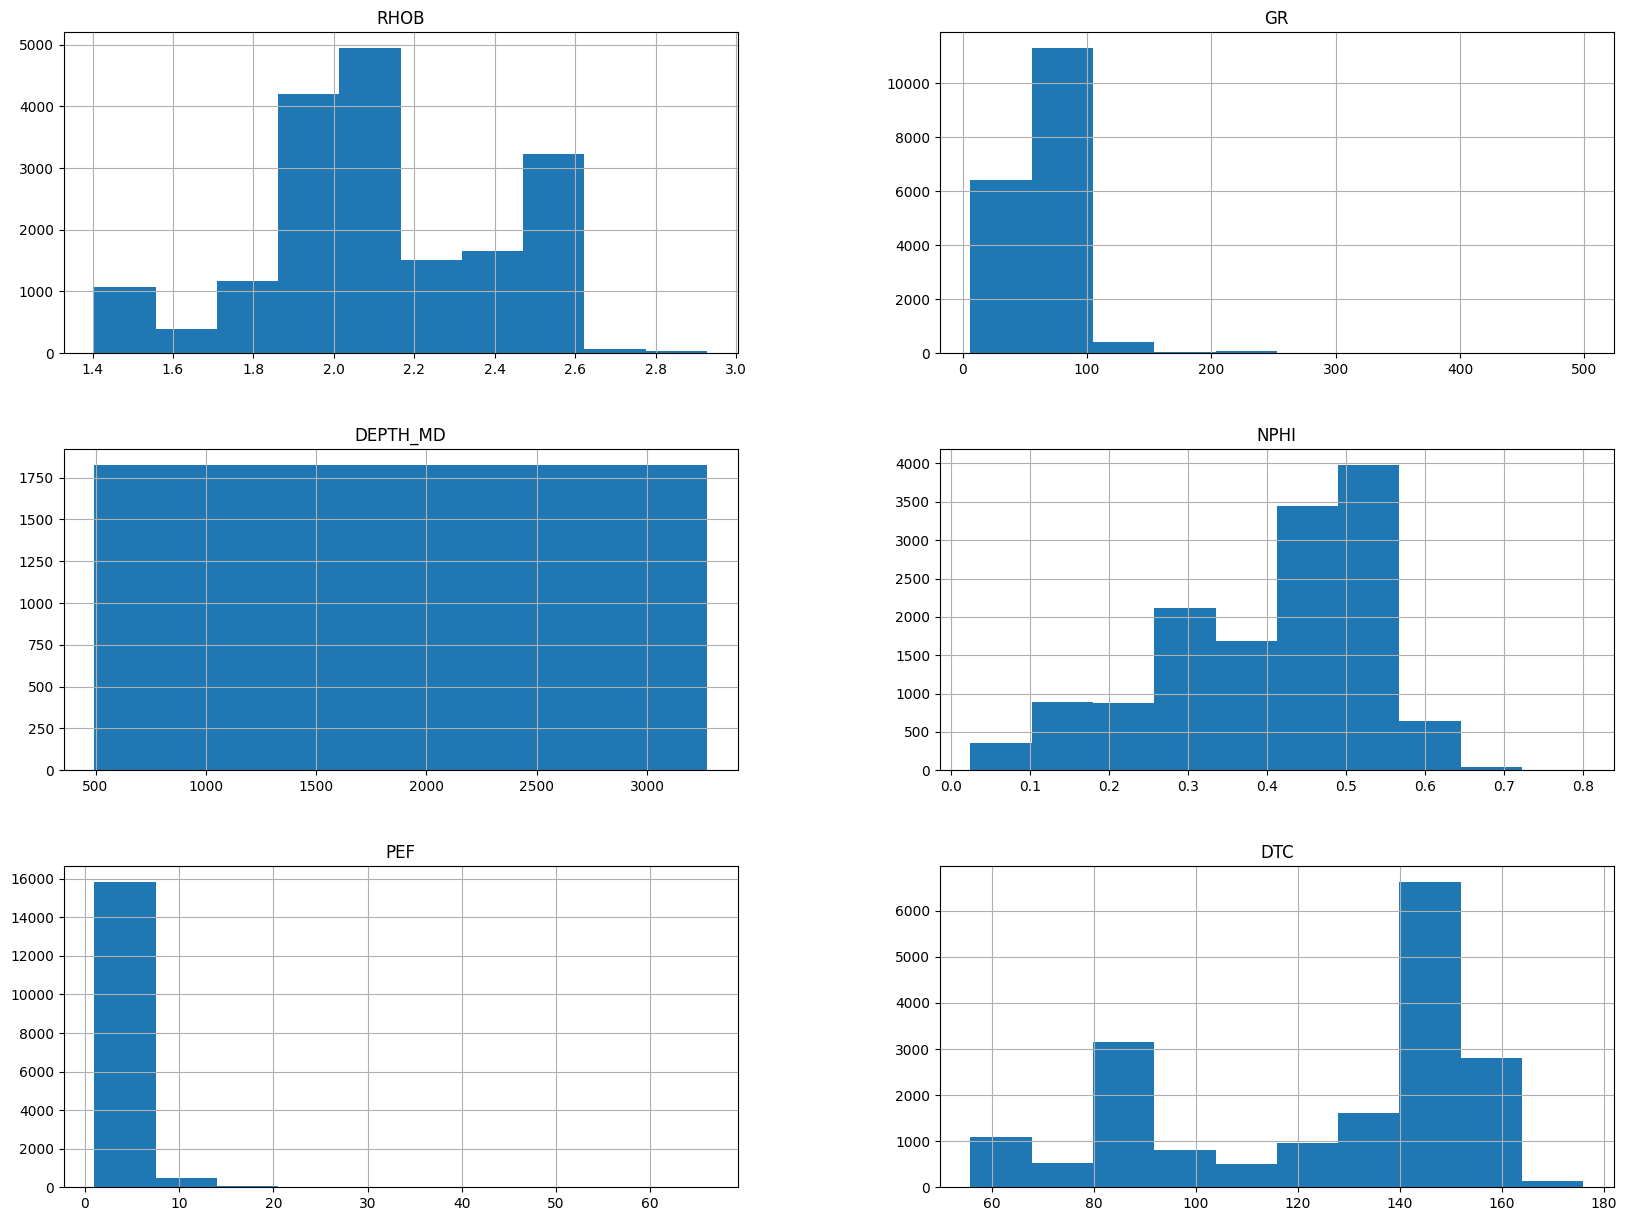

In [ ]:
freqgrph=df.select_dtypes(include=['float'])
freqgrph.hist(figsize=(20,15))
plt.show()

In [ ]:
for i in ['NPHI', 'PEF', 'DTC']:
    df[i]=df[i].fillna(df[i].median())

In [ ]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['RHOB','NPHI']]=scaler.fit_transform(df[['RHOB','NPHI']])

In [ ]:
x=df[['RHOB','NPHI']]

In [ ]:
x.head()

,RHOB,NPHI
0,-0.759999,0.285088
1,-0.741163,0.285088
2,-0.718560,0.285088
3,-0.734045,0.285088
4,-0.773944,0.285088


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init=10)
    km.fit(x)
    css=km.inertia_ #will calculate within cluster sum of squares(wcss value )
    wcss.append(css)

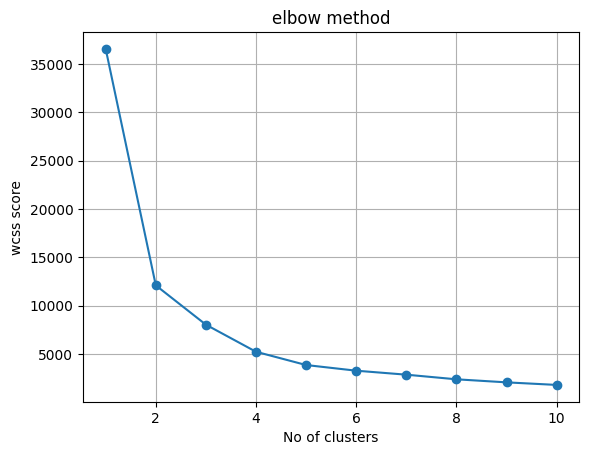

In [ ]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.title('elbow method')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [ ]:
cluster_label=km.predict(x)

In [ ]:
cluster_label

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

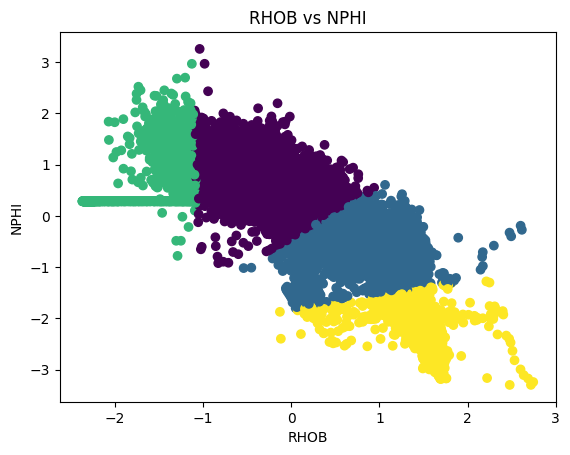

In [ ]:
plt.scatter(x['RHOB'], x['NPHI'],c=cluster_label)
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB vs NPHI')
plt.show()

In [ ]:
df['cluster labels']=cluster_label

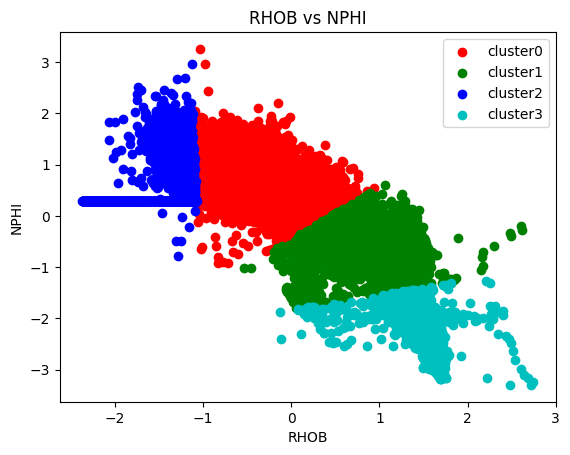

In [ ]:
colors=['r','g','b','c']

for i in range(max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI']
              ,c=colors[i],
              label=f'cluster{i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB vs NPHI')
plt.legend()
plt.show()

In [ ]:
def predict_cluster(RHOB,NPHI):
  new_data=[[RHOB,NPHI]]
  cluster=km.predict(new_data)
  return cluster[0]

In [ ]:
new_RHOB = -2.974767
new_NPHI= 2.864732

c =predict_cluster(new_RHOB, new_NPHI)
print(f"belongs to cluster {c}")

belongs to cluster 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_label)
print(sil_avg)

0.5595353270468845


In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


In [ ]:
mergings=linkage(x,method='ward')

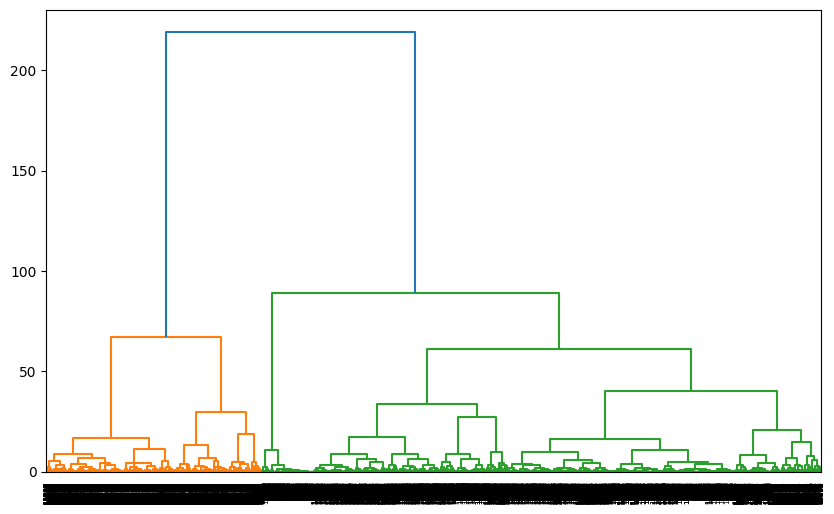

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels=fcluster(mergings,150,criterion='distance')

In [ ]:
cluster_labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

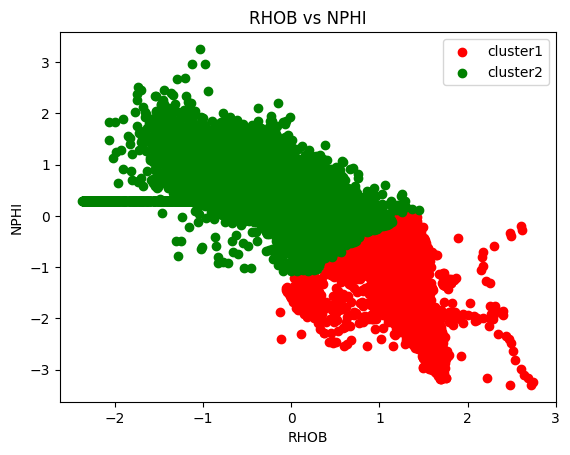

In [ ]:
colors=['r','g']

for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI']
              ,c=colors[i-1],
              label=f'cluster{i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB vs NPHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil_avg_value=silhouette_score(x,cluster_labels)
print(sil_avg_value)

0.6169823462077547


# **case 2**

In [ ]:
dft=pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
dft.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
dft.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
#checking for missing values
dft.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
dft.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
x=dft[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']]

In [ ]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [ ]:
wcss

[157595857524.9612,
 113217528878.79839,
 80342167254.53636,
 64855545845.90137,
 52928436116.57734,
 47010087226.32457,
 41647339958.828705,
 35921310197.210396,
 32764894723.422413,
 30259086695.341454]

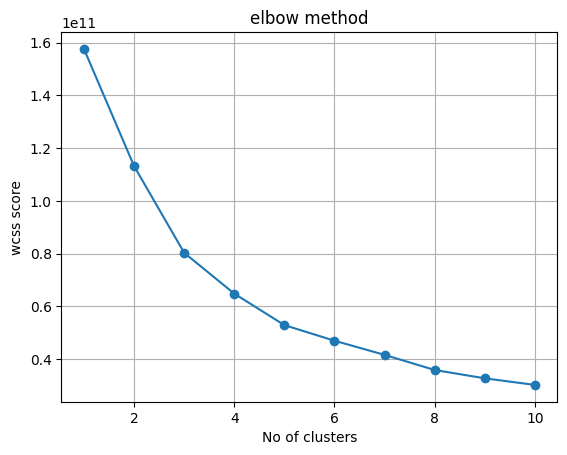

In [ ]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.title('elbow method')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil_score=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,n_init=10).fit(x)
  labels = kmeans.labels_
  sil_score.append(silhouette_score(x, labels))


In [ ]:
sil_score

[0.5115333882980367,
 0.4770179122900735,
 0.3955556136306276,
 0.3878346672087667,
 0.3846015979687127,
 0.31332057517476586,
 0.32285152128618544,
 0.31578535238666555,
 0.31195164583951235]

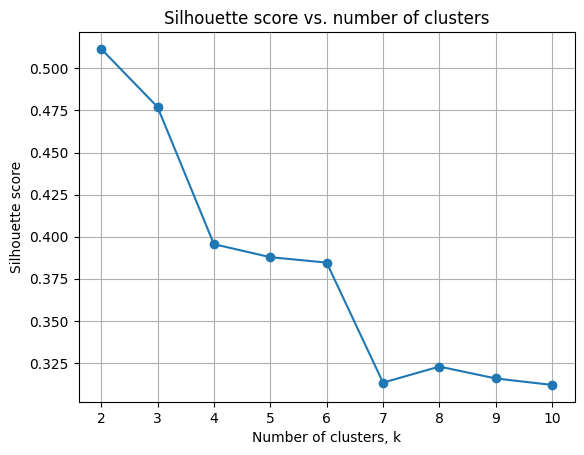

In [ ]:
plt.plot(range(2,11), sil_score, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs. number of clusters')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=2,n_init=10)
km.fit(x)

KMeans(n_clusters=2, n_init=10)

In [ ]:
cluster_label=km.predict(x)

In [ ]:
cluster_label

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

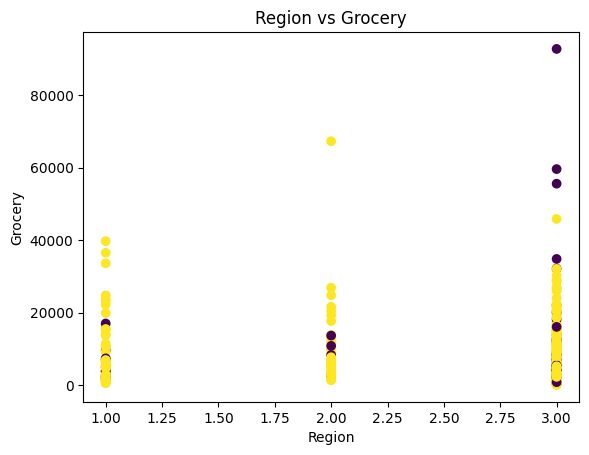

In [ ]:
plt.scatter(x['Region'],x['Grocery'],c=cluster_label)
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.show()

In [ ]:
dft['cluster labels']=cluster_label

In [ ]:
dft.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


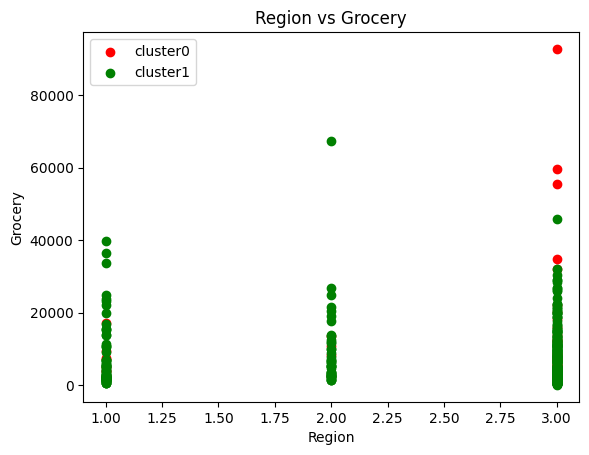

In [ ]:
colors=['r','g']

for i in range(max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['Region'],cluster_data['Grocery']
              ,c=colors[i],
              label=f'cluster{i}')
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.legend()
plt.show()

In [ ]:
#prediction
def predict_cluster(Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen):
  new_data=[[Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen]]
  cluster=km.predict(new_data)
  return cluster[0]

In [ ]:
#new data
Channel=2
Region=3
Fresh=6500
Milk=8560
Grocery=9567
Frozen=8976
Detergents_Paper=4537
Delicassen=9889

c=predict_cluster(Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen)
print(f'item belongs to : {c}')

item belongs to : 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
sil_avg=silhouette_score(x,cluster_label)
print(sil_avg)

0.5115333882980367


In [ ]:
#Agglomerative
mergings=linkage(x,method='ward')

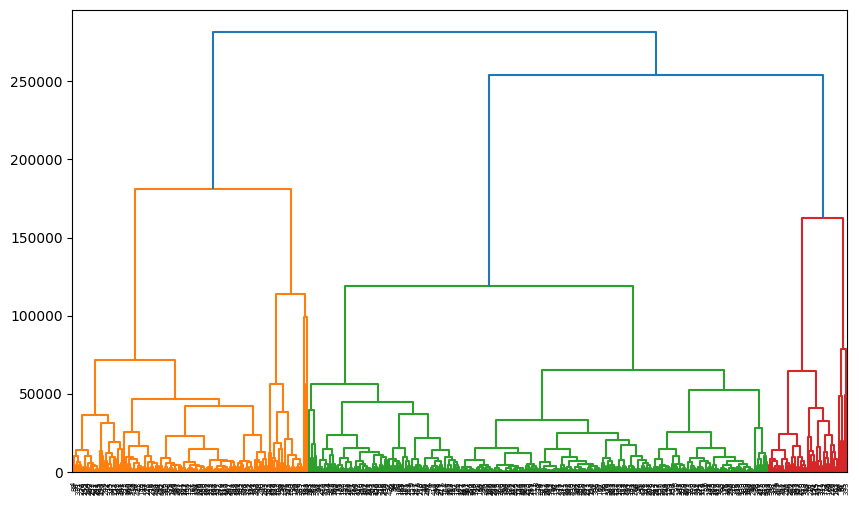

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels=fcluster(mergings,200000,criterion='distance')

In [ ]:
cluster_labels

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 1,
       2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,

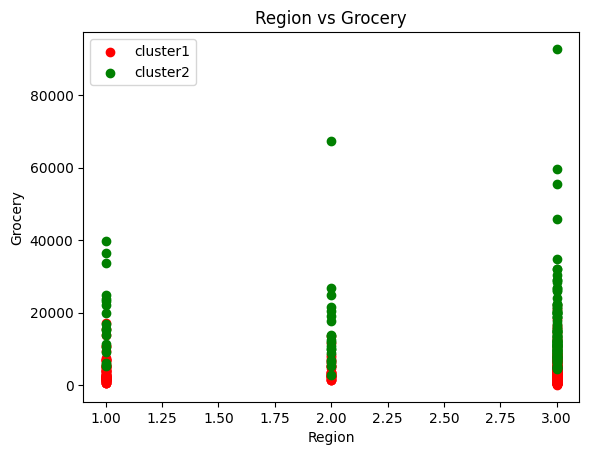

In [124]:
colors=['r','g','b']

for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Region'],cluster_data['Grocery']
              ,c=colors[i-1],
              label=f'cluster{i}')
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.3750155190004844


with scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
x_scaled=pd.DataFrame(x_scaled,columns=['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

In [ ]:
x_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x_scaled)
  css=km.inertia_
  wcss.append(css)

In [ ]:
wcss

[3520.0000000000014,
 2599.3844237836265,
 2149.2839562217573,
 1851.759576450657,
 1564.2770583717618,
 1313.9619874240173,
 1189.965843742138,
 1050.677559361155,
 980.9891178071357,
 921.8301752983333]

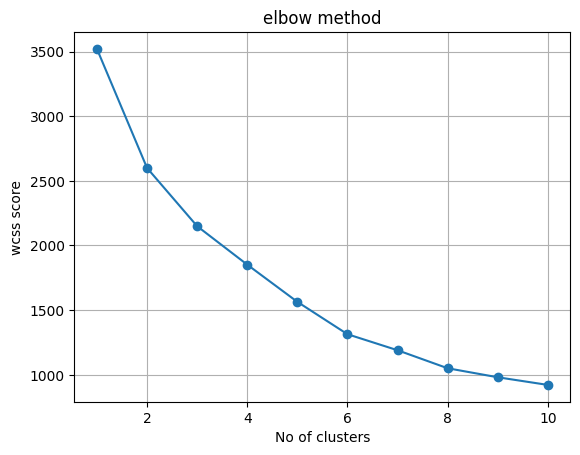

In [ ]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.title('elbow method')
plt.grid()
plt.show()

In [ ]:
sil_score=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,n_init=10).fit(x_scaled)
  labels = kmeans.labels_
  sil_score.append(silhouette_score(x_scaled, labels))

In [ ]:
sil_score

[0.3733740311185568,
 0.3567685389017652,
 0.34782361136344925,
 0.34691903042060557,
 0.35372758942528437,
 0.36168536185938693,
 0.3632393902108433,
 0.34963803375329244,
 0.3234196275712092]

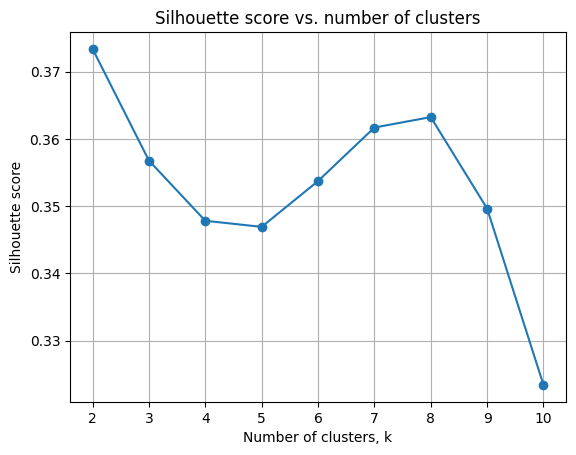

In [ ]:
plt.plot(range(2,11), sil_score, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs. number of clusters')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=2,n_init=10)
km.fit(x_scaled)

KMeans(n_clusters=2, n_init=10)

In [ ]:
cluster_labell=km.predict(x_scaled)

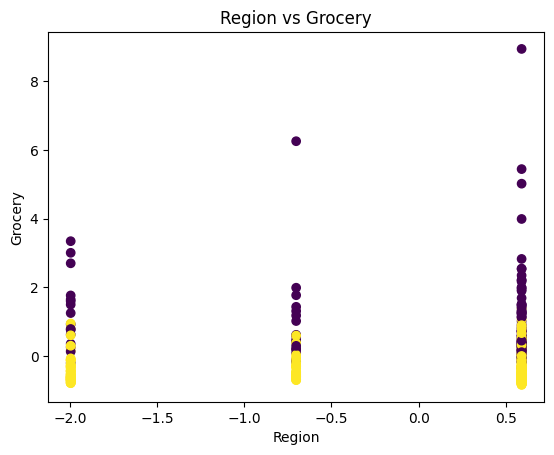

In [ ]:
plt.scatter(x_scaled['Region'],x_scaled['Grocery'],c=cluster_labell)
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.show()

In [ ]:
dft['cluster labels_scaled']=cluster_labell

In [ ]:
dft.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster labels,cluster labels_scaled
0,2,3,12669,9656,7561,214,2674,1338,1,0
1,2,3,7057,9810,9568,1762,3293,1776,1,0
2,2,3,6353,8808,7684,2405,3516,7844,1,0
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,0,0


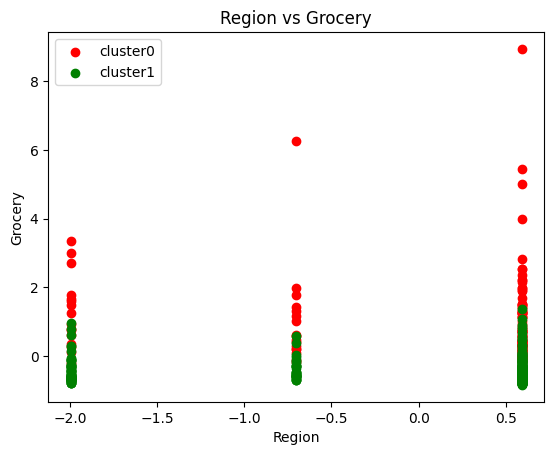

In [ ]:
colors=['r','g']

for i in range(max(cluster_labell+1)):
  cluster_data=x_scaled[cluster_labell==i]
  plt.scatter(cluster_data['Region'],cluster_data['Grocery']
              ,c=colors[i],
              label=f'cluster{i}')
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.legend()
plt.show()

In [ ]:
#prediction
def predict_cluster(Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen):
  new_data=[[Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen]]
  cluster=km.predict(new_data)
  return cluster[0]

In [ ]:
#new data
Channel=2
Region=3
Fresh=6500
Milk=8560
Grocery=9567
Frozen=8976
Detergents_Paper=4537
Delicassen=9889

c=predict_cluster(Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen)
print(f'item belongs to : {c}')

item belongs to : 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
sil_avg=silhouette_score(x_scaled,cluster_labell)
print(sil_avg)

0.3733740311185568


In [ ]:
#Agglomerative
mergings=linkage(x_scaled,method='ward')

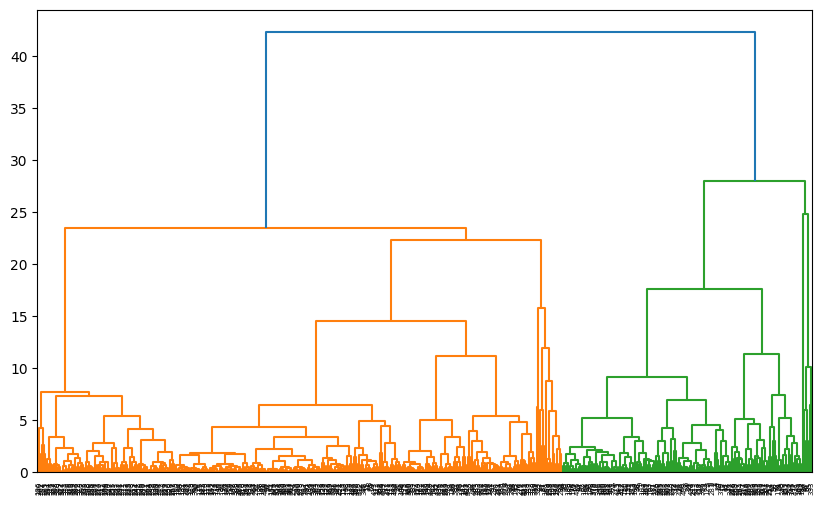

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labells=fcluster(mergings,30,criterion='distance')

In [ ]:
cluster_labells


array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

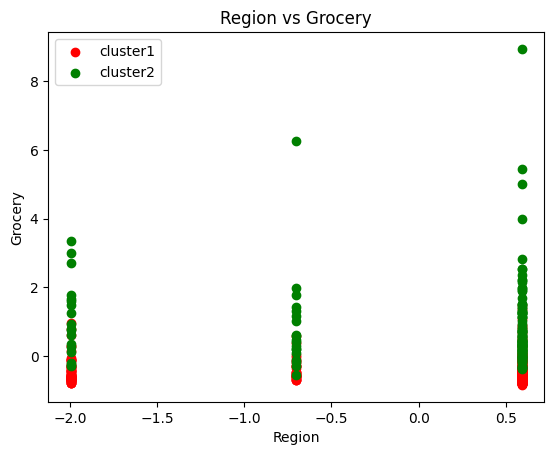

In [125]:
colors=['r','g']

for i in range(1,max(cluster_labells+1)):
  cluster_data=x_scaled[cluster_labells==i]
  plt.scatter(cluster_data['Region'],cluster_data['Grocery']
              ,c=colors[i-1],
              label=f'cluster{i}')
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x_scaled,cluster_labells)
print(sil_avg)

0.3680209405194812


Before scaling give more accurate value